## Librerias

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, accuracy_score
from sklearn import preprocessing

from matplotlib import offsetbox
from sklearn.manifold import TSNE

from sklearn.manifold import MDS

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

## DataBase

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

### Limpieza de datos

In [29]:
# tamaño
print(f'Tamaño:{digits.data.shape}')
# numero de nulos
print(X[~np.isnan(X)].shape - np.array(64*1797))

Tamaño:(1797, 64)
[0]


### Normalización

In [30]:
X = preprocessing.MinMaxScaler().fit_transform(X)

## PCA

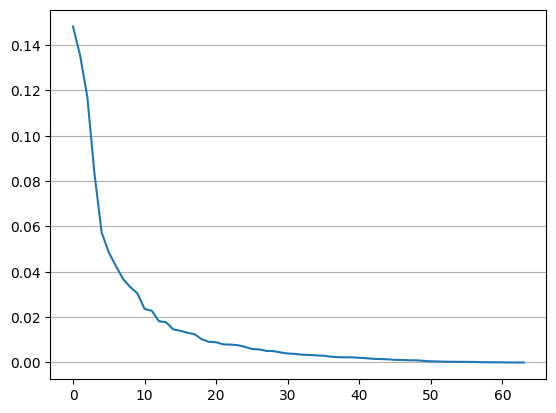

In [31]:
# Visualización de varianza
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.grid(axis='y')

# Funcion de numero de componentes
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

### PCA 95% y 2

In [38]:
# crear numero 95%
num_95 = min_var(.95,pca.explained_variance_ratio_)
print(num_95)

# fit PCA
pca95 = PCA(num_95).fit_transform(X)
pca2 = PCA(2).fit_transform(X)

30


# Grafico Varianza Acomulada


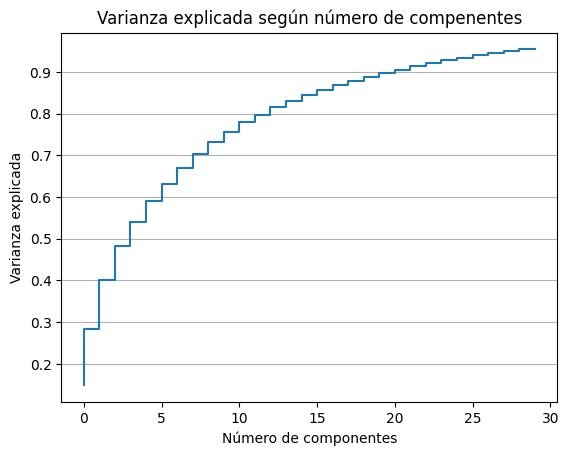

In [33]:
# varianza acomulada
cum_var_pca95 = np.cumsum(pca95_fit.explained_variance_ratio_)

# gráfico 
plt.step(range(0,num_95), cum_var_pca95)
plt.ylabel('Varianza explicada')
plt.xlabel('Número de componentes')
plt.grid(axis='y')
plt.title('Varianza explicada según número de compenentes')
plt.show()

### Funciones proyección

In [34]:
def plot_embedding(X, title):
    _, ax = plt.subplots(figsize=(8, 8))
    X = preprocessing.MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425, # The alpha blending value, between 0 (transparent) and 1 (opaque)
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 2e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i] 
        ) # Container referring to a specific position xy defined by X[i]
        imagebox.set()
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

## TNSE

c:\Users\joses\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\joses\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


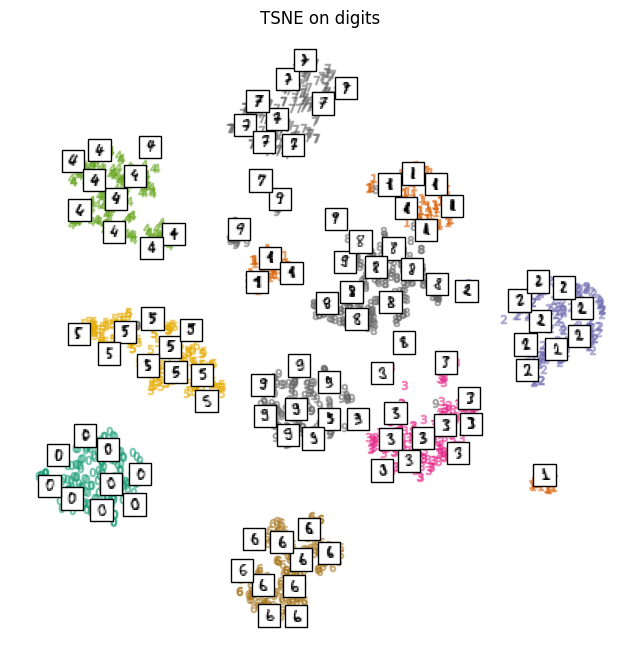

In [49]:
tsne_embed = TSNE(n_components=2, perplexity = 20, n_iter=500, n_iter_without_progress=150, n_jobs=10) 
# consideramos perpexity 20 pues no es una base de datos 
# que requiera valores mayores, por sis dimenciones
projection_tnse = tsne_embed.fit_transform(X, y)
plot_embedding(projection_tnse, 'TSNE on digits')
plt.show()

## MDS

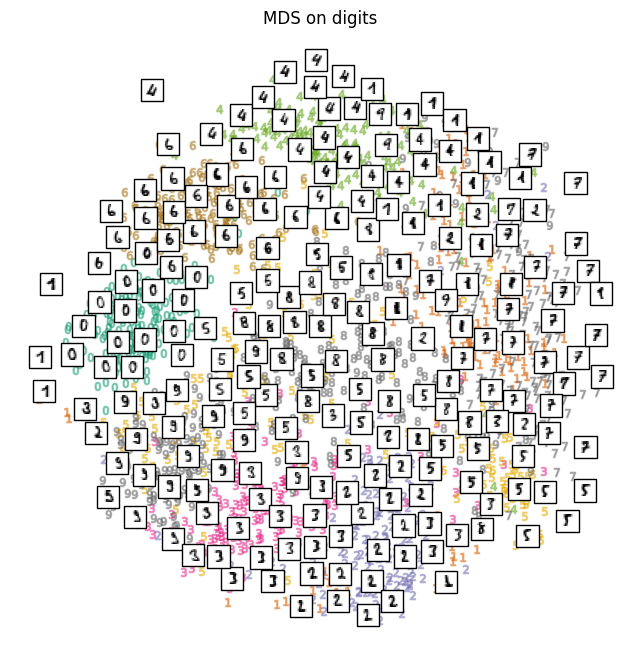

In [50]:
mds_embed = MDS(n_components=2, max_iter=500, n_jobs=10)
projection_mds = mds_embed.fit_transform(X, y)
plot_embedding(projection_mds, 'MDS on digits')
plt.show()

# KMEANS

### Funciones

In [57]:
# parametros
k_values = [5,6,7,8,9,10]

In [56]:
# codigo grafico elbow
def elbow_plot(k_values, model):
    # inertia vector
    mean_intertia = []
    for k in k_values:
        km = KMeans(init = 'random', n_clusters = k, n_init = 4)
        km.fit(model)
        mean_intertia.append(km.inertia_/k)
    # inertia plot
    plt.plot(k_values, mean_intertia, color = 'steelblue')
    plt.grid()
    plt.xlabel('number of clusters')
    plt.ylabel('Mean SSE')
    plt.title('Mean SSE by number of clusters')
    plt.show()


In [55]:
def graficar_silluette(k_values, model):
    for k in k_values:
        # modelos
        km = KMeans(init = 'random', n_clusters = k, n_init = 4)
        mod = km.fit(model)
        # silluette score
        cluster_labels = mod.fit_predict(model)
        # grafico
        fig, ax = plt.subplots(figsize = (6,12))
        ax.set_xlim([-1, 1])
        ax.set_ylim([0,len(model)+10*(k+1)])
        # silluette score
        silhouette_avg = silhouette_score(model, cluster_labels)
        print(
            "For n_clusters =",
            k,
            "The average silhouette_score is :",
            silhouette_avg,
        )
        sample_silhouette_values = silhouette_samples(model, cluster_labels)
        # graficos
        y_lower = 10
        for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]  
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / k)
            ax.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

            ax.set_title("Silhouette plot")
            ax.set_xlabel("The silhouette coefficient values")
            ax.set_ylabel("Cluster label")

            # The vertical line for average silhouette score of all the values
            ax.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax.set_yticks([])  # Clear the yaxis labels / ticks
            ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % k,
            fontsize=14,
            fontweight="bold",
            )

    plt.show()

In [58]:
# funcion kmeans
def modelos_kmeans(k_values, model):
    out = []
    for k in k_values:
        # modelos
        km = KMeans(init = 'random', n_clusters = k, n_init = 4)
        mod = km.fit(model)
        # silluette score
        cluster_labels = mod.fit_predict(model)
        out.append([km,mod,cluster_labels])
    return out


### PCA 2

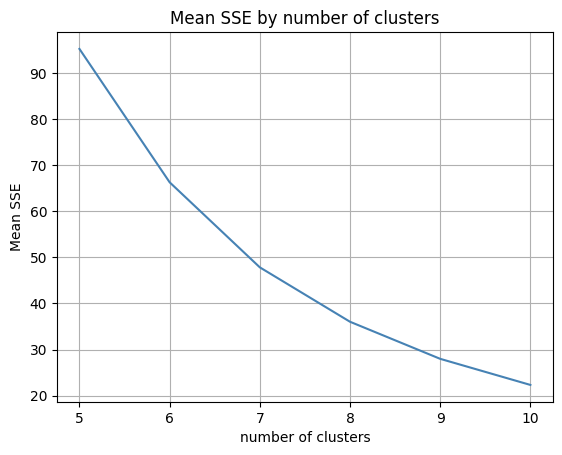

For n_clusters = 5 The average silhouette_score is : 0.39419130657154056
For n_clusters = 6 The average silhouette_score is : 0.40464867503168817
For n_clusters = 7 The average silhouette_score is : 0.40119568469289885
For n_clusters = 8 The average silhouette_score is : 0.3912720761931387
For n_clusters = 9 The average silhouette_score is : 0.4031137680330698
For n_clusters = 10 The average silhouette_score is : 0.39206042678039876


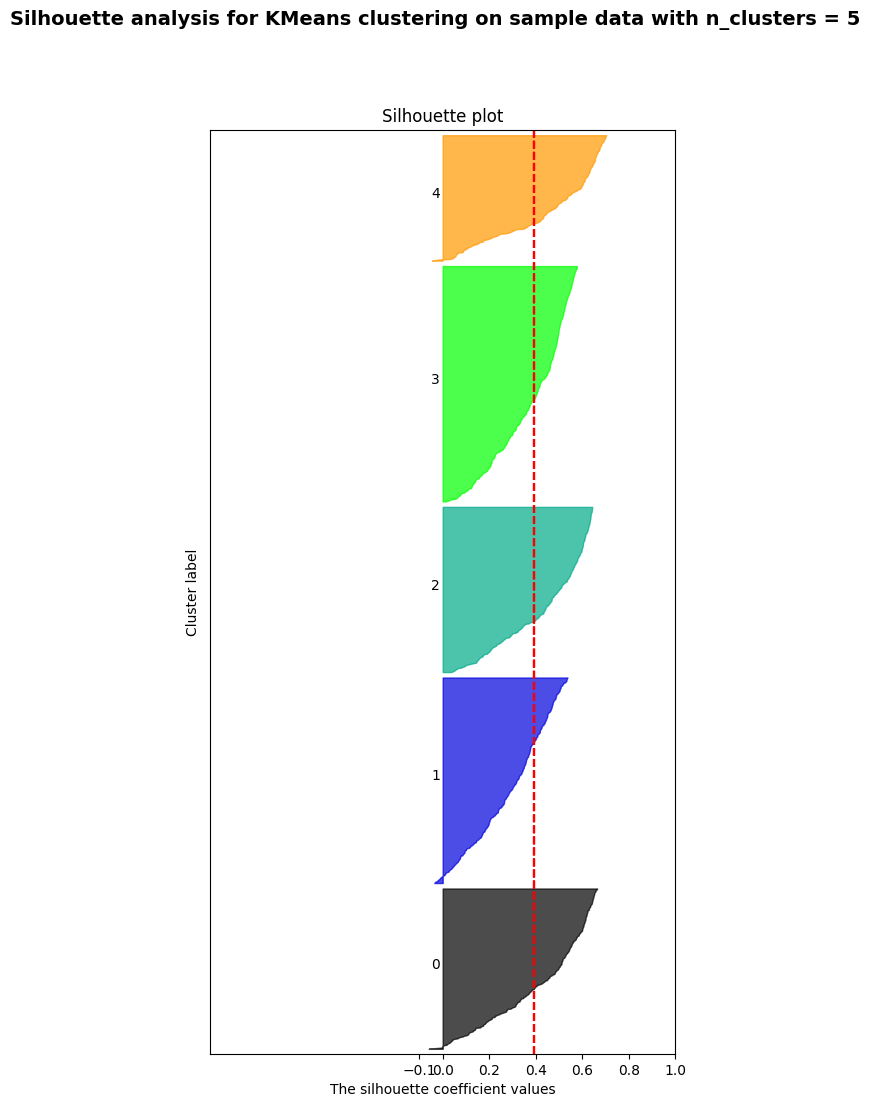

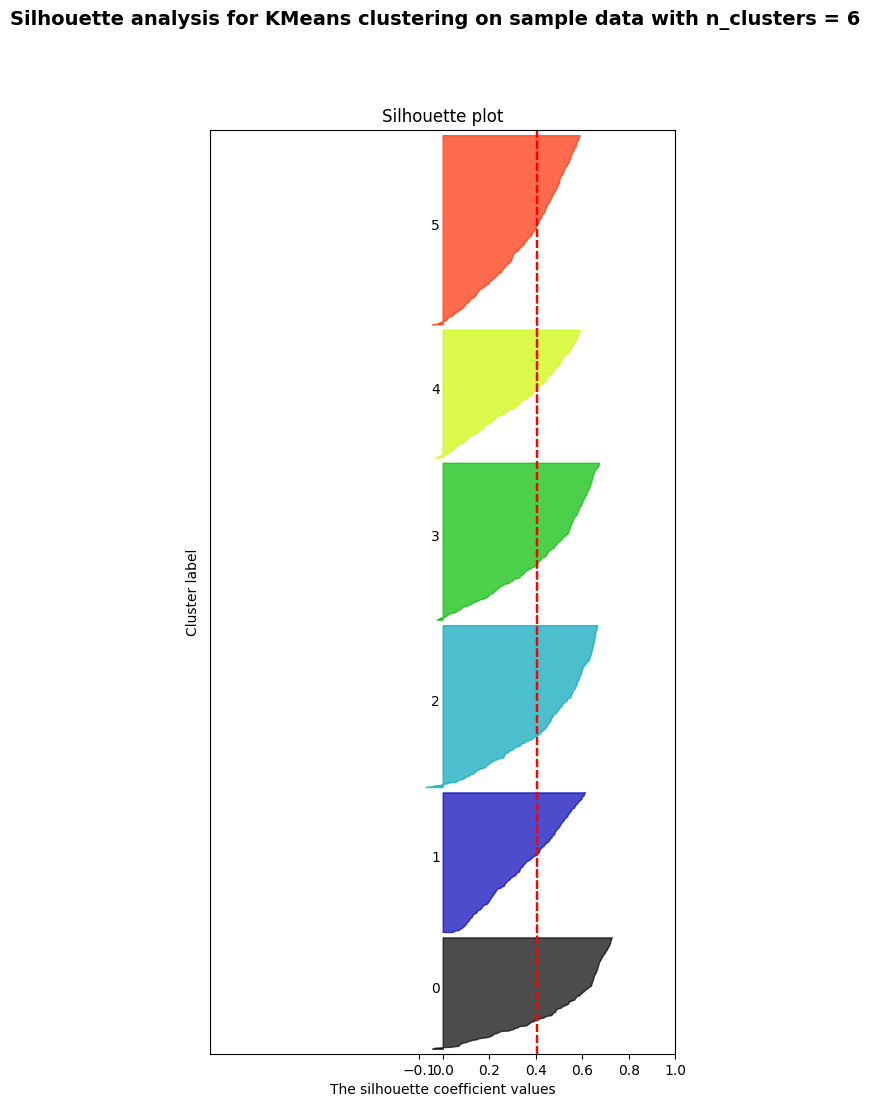

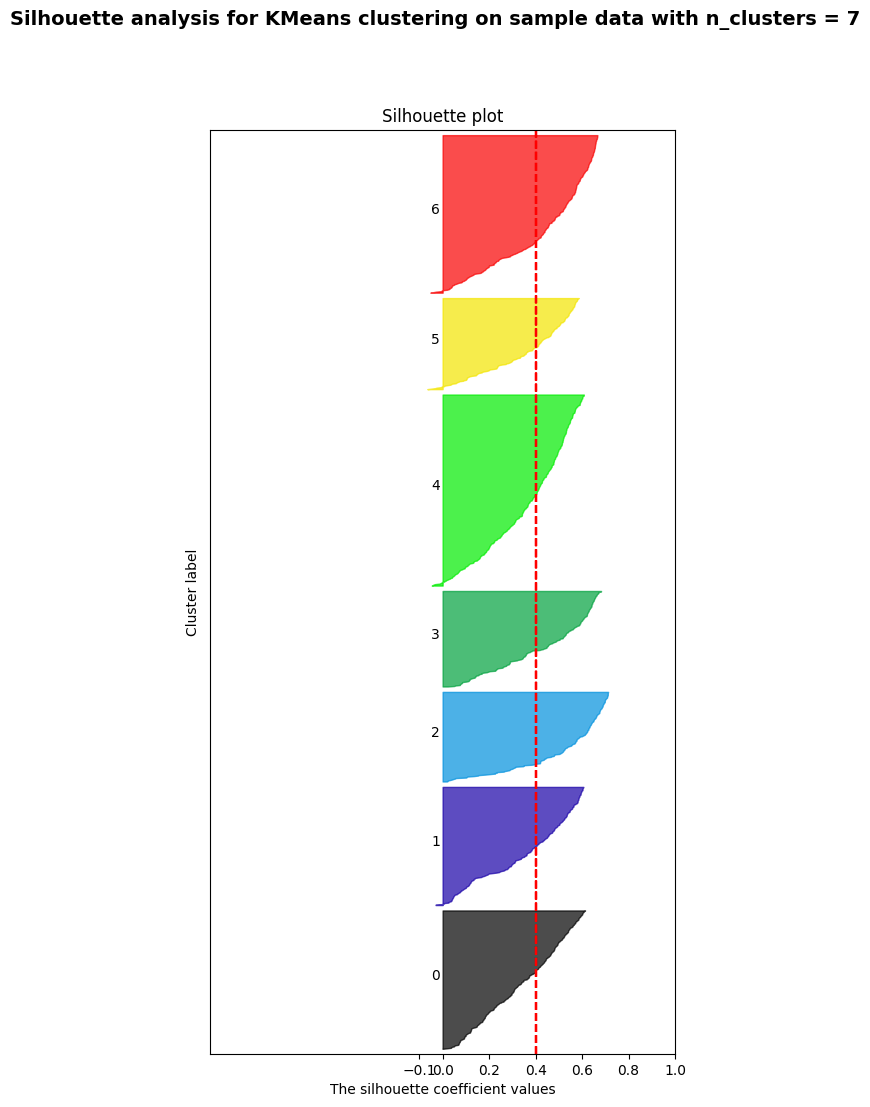

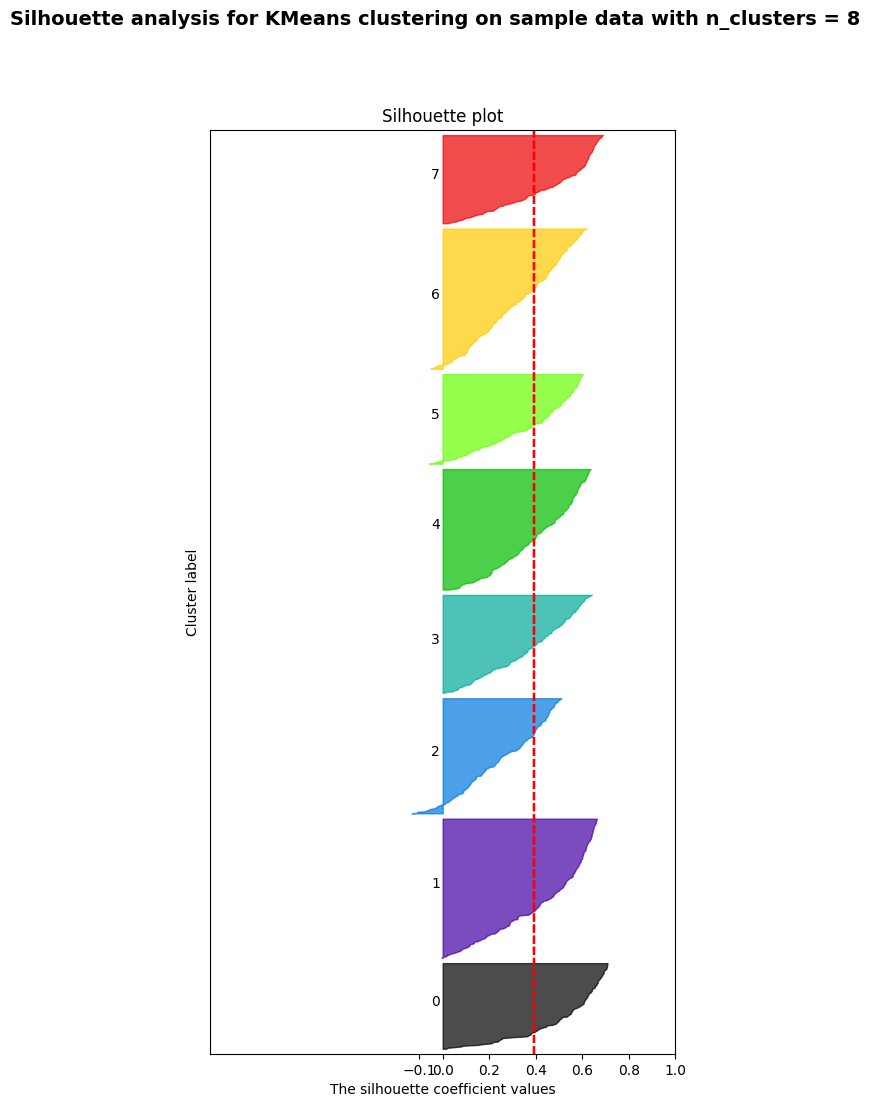

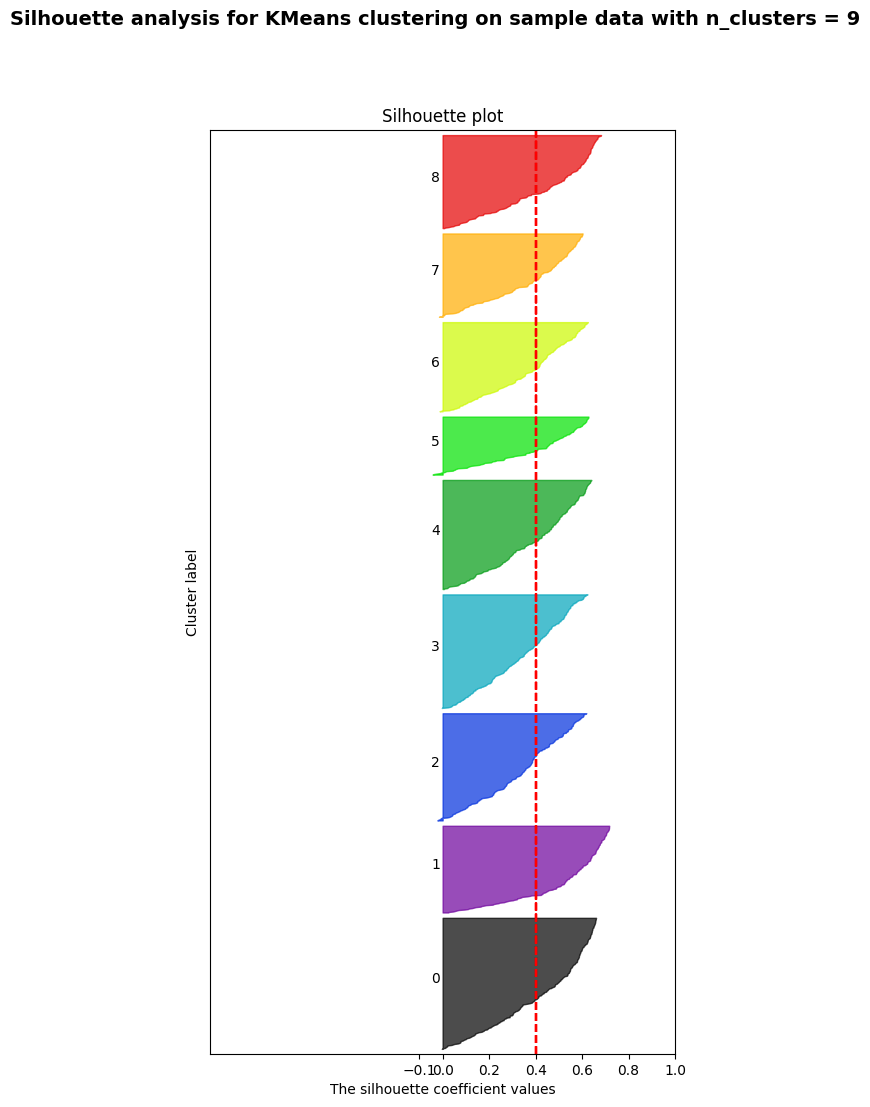

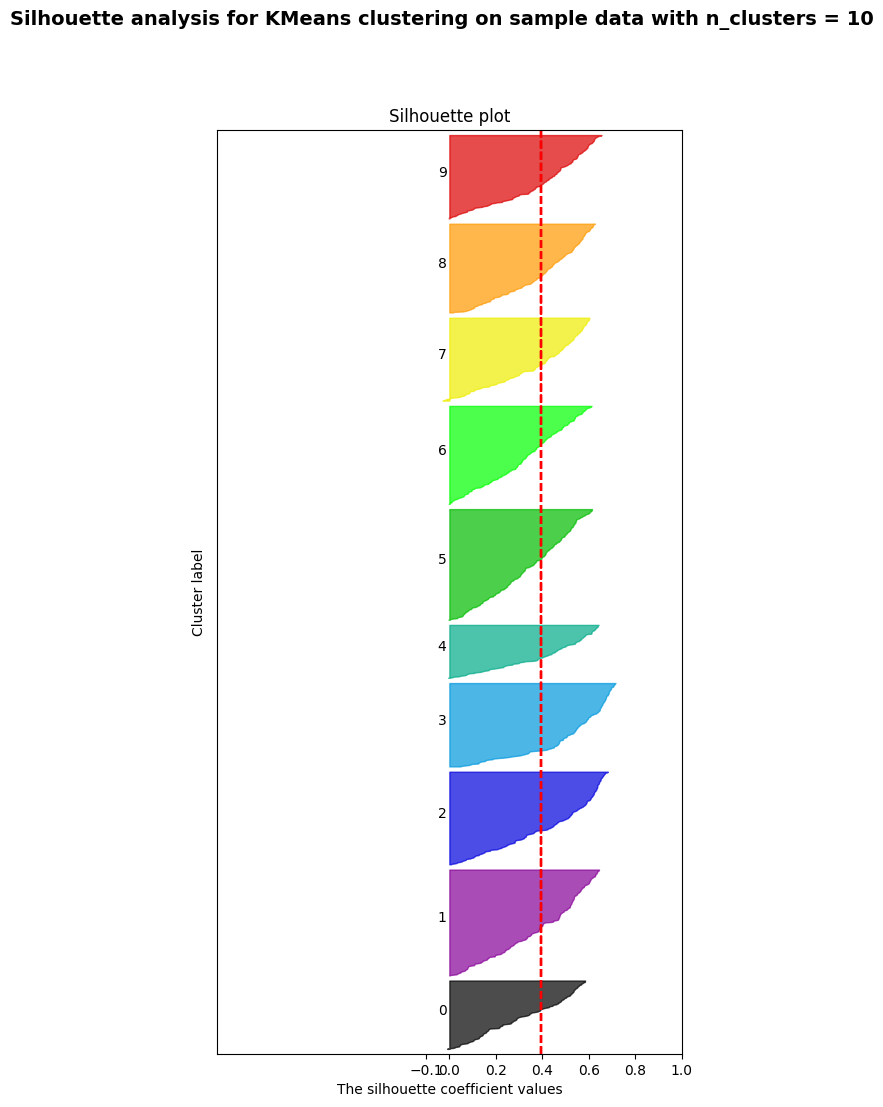

In [61]:
# hacer modelos kmeans
kmeans_pca2 = modelos_kmeans(k_values, pca2)
elbow_plot(k_values, pca2)
graficar_silluette(k_values, pca2)

En cuanto al gráfico elbow notamos que el óptimo es 6 o 7, mientras que el silluette score indica que es 7.

Los graficos de silluette score muestran que no hay n numero que destaque además de esto, además de abogar por el $k = 7$. Entonces este es el k óptimo en este caso

In [64]:
accuracy_score(
    y,KMeans(init='random', n_clusters=5,n_init=4).fit_predict(pca2)
)

0.00667779632721202